<a href="https://colab.research.google.com/github/TAkkerboom/DL2_socratic_models_team_2/blob/main/demos/test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#@title Load our Git repository
!git clone 'https://github.com/TAkkerboom/DL2_socratic_models_team_2.git'

Cloning into 'DL2_socratic_models_team_2'...
remote: Enumerating objects: 291, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 291 (delta 56), reused 62 (delta 17), pack-reused 173
Receiving objects: 100% (291/291), 533.28 KiB | 5.39 MiB/s, done.
Resolving deltas: 100% (149/149), done.


In [ ]:
#@title install dependencies
pip install transformers

In [59]:
# %cd /content/DL2_socratic_models_team_2
# !git pull

In [17]:
#@title Load Raven Progressive matrices
from DL2_socratic_models_team_2.main import Demo
from DL2_socratic_models_team_2.src.dataset import Raven
import transformers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


# load the Raven Progressive matrices 
test_set = Raven('/content/DL2_socratic_models_team_2/center_single_subset', 'test', '')
test_set.load_data()

In [57]:
#@title plot_puzzle function (hidden)
# this function visualizes the puzzles from our test dataset
def plot_puzzle(test_set, puzzle, index):
  if puzzle == 'puzzle':
    image_grid = np.zeros((480, 480))

    # Create a loop to go through each image
    for j in range(8):
        # Extract each image from the dataset
        img = test_set.get_puzzle(index)[j]
        # Reshape each image to (160, 160)
        # img = img.reshape(160, 160)
        # Calculate the starting index of each image
        start_i = (j // 3) * 160
        start_j = (j % 3) * 160
        # Get the ending index of each image
        end_i = start_i + 160
        end_j = start_j + 160
        # Place the image in the empty array
        image_grid[start_i:end_i, start_j:end_j] = img

    # Plot the final image
    plt.title("Puzzle {}".format(index))
    plt.imshow(image_grid)
  else:
    fig, axes = plt.subplots(2, 4)
    fig.suptitle('Answers to puzzle {}'.format(index))
    for j in range(4):
        axes[0][j].imshow(test_set.get_puzzle(index)[j])
        axes[1][j].imshow(test_set.get_puzzle(index)[7+j])
    plt.show()

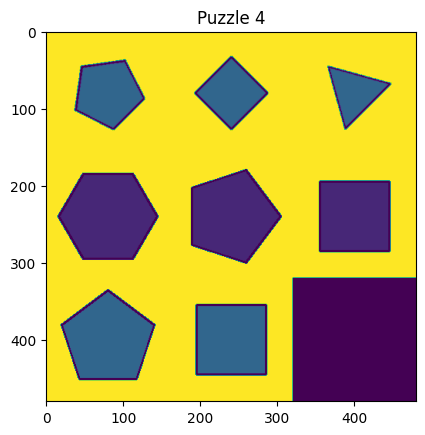

In [23]:
#@title Take a look at the puzzle yourself!

# change the variable PUZZLE_NUMBER to see different puzzles
PUZZLE_NUMBER = 4
plot_puzzle(test_set, 'puzzle', PUZZLE_NUMBER)

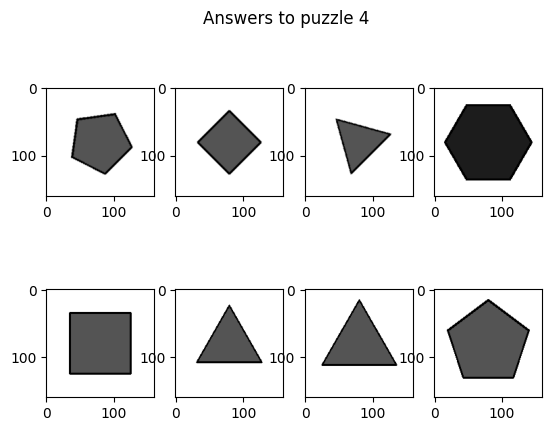

In [58]:
#@title Can you solve it by looking at the answers?

plot_puzzle(test_set, 'answers', PUZZLE_NUMBER)

In [ ]:
#@title Let the Socratic Model solve it

# first load the socratic model
SocraticModel = Demo()

loading vlm...


loading lm...


In [ ]:
#@title Prediction by SM

# outputs prediction by the Socratic Model
puzzle = test_set.get_puzzle(PUZZLE_NUMBER)
SocraticModel.forward(puzzle)